In [ ]:
#!pip install missingno

In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import missingno as msno

In [2]:
ls crime_data_raw/2010

apr10.xls*  dec10.xls*  jan10.xls*  jun10.xls*  may10.xls*  oct10.xls*
aug10.xls*  feb10.xls*  jul10.xls*  mar10.xls*  nov10.xls*  sep10.xls*


In [3]:
path = 'crime_data_raw/2010'

In [4]:
ls crime_data_raw/

10years/    2006/  2009/  2012/  2015/  premise_codes.csv*
1985_2014/  2007/  2010/  2013/  2016/  Untitled Folder/
2005/       2008/  2011/  2014/  2017/


In [5]:
# get premise codes

pc = pd.read_csv('crime_data_raw/premise_codes.csv')
pc.head()

,Premise Type,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [6]:
# rename premise column for easy merge
pc.rename(columns={'Premise Type': 'Premise',}, inplace=True)
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
Premise                126 non-null object
Premise Description    126 non-null object
dtypes: object(2)
memory usage: 2.0+ KB


In [7]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 

df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

WARNING *** file size (2752234) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136263 entries, 0 to 136262
Data columns (total 12 columns):
# Of Offenses    136262 non-null float64
Beat             136262 non-null object
Block Range      136262 non-null object
Date             136262 non-null datetime64[ns]
Field11          0 non-null float64
Hour             136262 non-null float64
Offense Type     136262 non-null object
Premise          136262 non-null object
Street Name      136262 non-null object
Suffix           136262 non-null object
Type             136262 non-null object
Unnamed: 1       0 non-null float64
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 12.5+ MB


In [9]:
df.head()

,# Of Offenses,Beat,Block Range,Date,Field11,Hour,Offense Type,Premise,Street Name,Suffix,Type,Unnamed: 1
0,1.0,13D20,6600-6699,2010-04-17,NaN,0.0,Murder,05W,HEFFERNAN,-,-,NaN
1,1.0,11H40,10100-10199,2010-04-08,NaN,20.0,Murder,20R,LUCORE,-,-,NaN
2,2.0,19G20,11400-11499,2010-04-01,NaN,22.0,Murder,13R,CARVEL,-,LN,NaN
3,1.0,10H60,3700-3799,2010-04-17,NaN,1.0,Murder,13R,WHEELER,-,-,NaN
4,1.0,14D30,5100-5199,2010-04-08,NaN,23.0,Murder,20R,MYRTLEWOOD,-,DR,NaN


In [10]:
# check if  null values
df.isnull().values.any().any()

True

In [11]:
# check su, of null values
df.isnull().values.sum()

272536

In [14]:
len(df[df.isnull().any(axis=1)])

136263

## Visualize our data

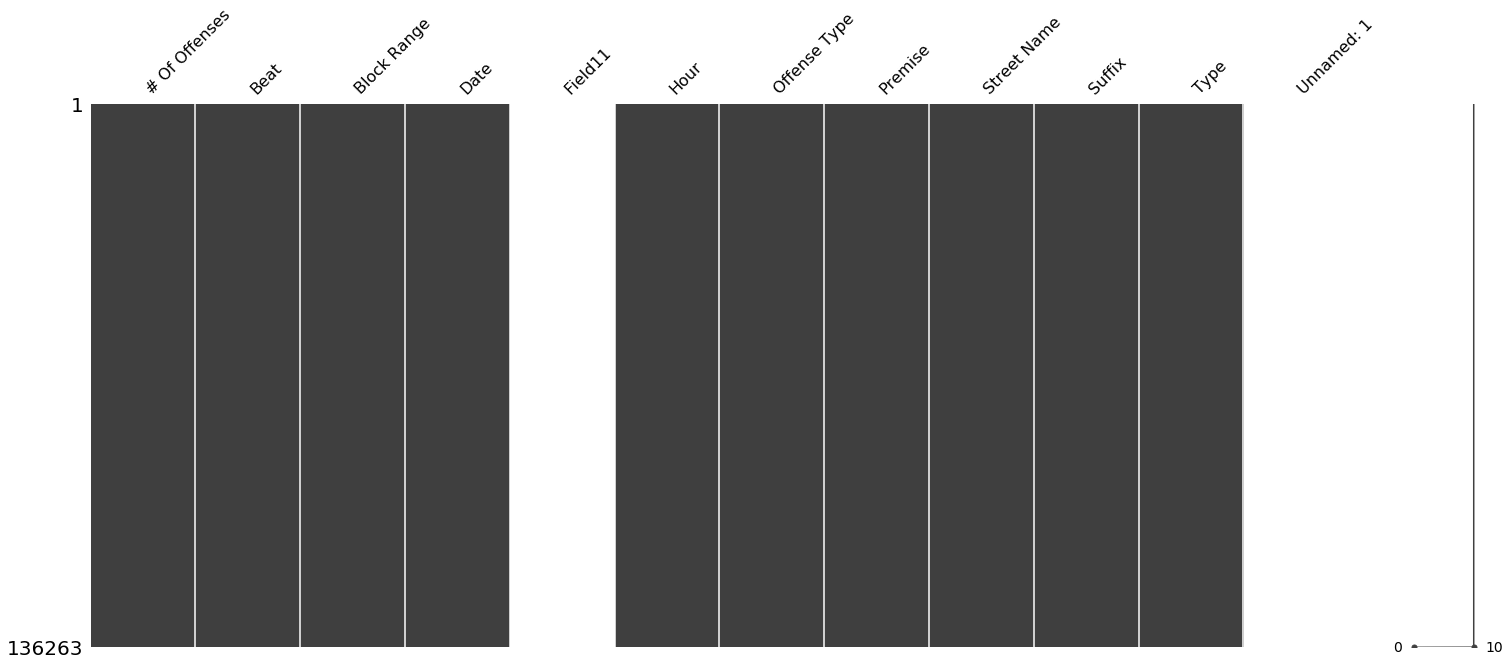

In [12]:
#data = df.replace("nan", np.nan)


sorted_data = msno.nullity_sort(df, sort='descending')
msno.matrix(sorted_data)

## col cleaning

- joining similar columns
- renaming

In [13]:
df.head()

,# Of Offenses,Beat,Block Range,Date,Field11,Hour,Offense Type,Premise,Street Name,Suffix,Type,Unnamed: 1
0,1.0,13D20,6600-6699,2010-04-17,NaN,0.0,Murder,05W,HEFFERNAN,-,-,NaN
1,1.0,11H40,10100-10199,2010-04-08,NaN,20.0,Murder,20R,LUCORE,-,-,NaN
2,2.0,19G20,11400-11499,2010-04-01,NaN,22.0,Murder,13R,CARVEL,-,LN,NaN
3,1.0,10H60,3700-3799,2010-04-17,NaN,1.0,Murder,13R,WHEELER,-,-,NaN
4,1.0,14D30,5100-5199,2010-04-08,NaN,23.0,Murder,20R,MYRTLEWOOD,-,DR,NaN


In [15]:
df.rename(columns={
    '# Of Offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
    'Block Range': 'BlockRange',
    'Street Name': 'StreetName'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136263 entries, 0 to 136262
Data columns (total 12 columns):
NumOffenses    136262 non-null float64
Beat           136262 non-null object
BlockRange     136262 non-null object
Date           136262 non-null datetime64[ns]
Field11        0 non-null float64
Hour           136262 non-null float64
OffenseType    136262 non-null object
Premise        136262 non-null object
StreetName     136262 non-null object
Suffix         136262 non-null object
Type           136262 non-null object
Unnamed: 1     0 non-null float64
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 12.5+ MB


## Subset dataframe to work on 

In [16]:
crimes = df[['Date','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136263 entries, 0 to 136262
Data columns (total 8 columns):
Date           136262 non-null datetime64[ns]
Beat           136262 non-null object
BlockRange     136262 non-null object
StreetName     136262 non-null object
OffenseType    136262 non-null object
Premise        136262 non-null object
NumOffenses    136262 non-null float64
Hour           136262 non-null float64
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 8.3+ MB


## Find NaN
- drop if > 2 nan

In [19]:
len(crimes[crimes.isnull().any(axis=1)])

1

In [20]:
crimes[crimes.isnull().any(axis=1)]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
136262,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
crimes = crimes.dropna(thresh=2)

In [22]:
crimes[crimes.isnull().any(axis=1)]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


## Joint dataframes

In [23]:
# join two datarames
crimes = pd.merge(crimes, pc, on='Premise', how='outer')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136263 entries, 0 to 136262
Data columns (total 9 columns):
Date                   136262 non-null datetime64[ns]
Beat                   136262 non-null object
BlockRange             136262 non-null object
StreetName             136262 non-null object
OffenseType            136262 non-null object
Premise                136263 non-null object
NumOffenses            136262 non-null float64
Hour                   136262 non-null float64
Premise Description    136214 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 10.4+ MB


In [24]:
crimes.head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
0,2010-04-17,13D20,6600-6699,HEFFERNAN,Murder,05W,1.0,0.0,WAREHOUSE
1,2010-04-01,14D20,3400-3499,CORDER,Burglary,05W,1.0,0.0,WAREHOUSE
2,2010-04-08,6B40,10200-10299,NORTH,Burglary,05W,1.0,23.0,WAREHOUSE
3,2010-04-23,13D10,6100-6199,SOUTH LP E,Burglary,05W,1.0,19.0,WAREHOUSE
4,2010-04-06,3B10,5900-5999,CENTRALCREST,Burglary,05W,1.0,17.0,WAREHOUSE


## Visualize data

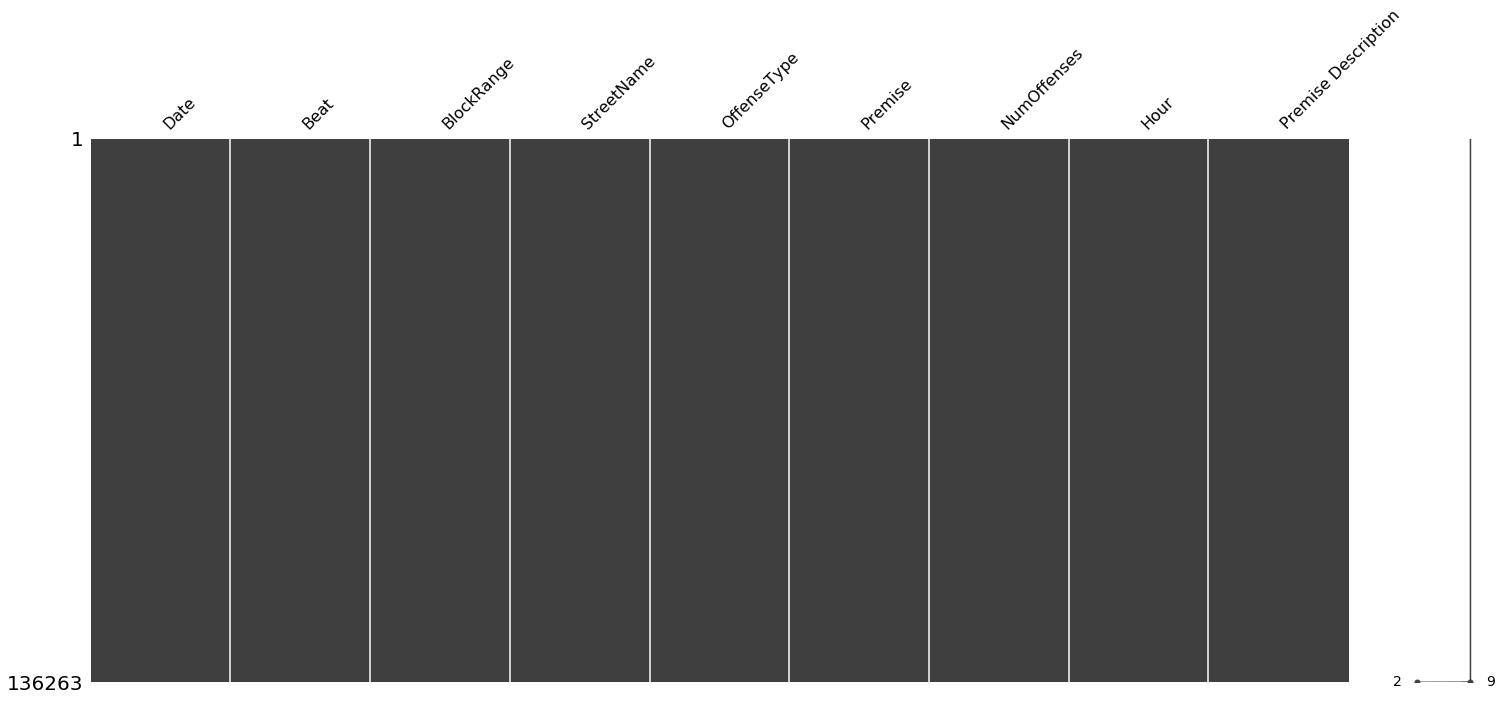

In [25]:
sorted_data = msno.nullity_sort(crimes, sort='descending')
msno.matrix(sorted_data)

## Display any null values

In [26]:
len(crimes[crimes.isnull().any(axis=1)])

50

In [27]:
crimes[crimes.isnull().any(axis=1)]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
135899,2010-04-29,18F50,3200-3299,GESSNER,Theft,---,1.0,21.0,NaN
135900,2010-07-29,19G10,8800-8899,BOONE,Rape,---,1.0,18.0,NaN
135901,2010-08-18,20G10,10000-10099,WESTPARK,Aggravated Assault,---,1.0,18.0,NaN
135902,2010-08-23,16E30,5100-5199,KELLING,Aggravated Assault,---,1.0,8.0,NaN
135903,2007-02-05,1A30,2400-2499,RICHMOND,Auto Theft,---,1.0,8.0,NaN
135904,2010-06-25,7C20,4800-4899,HOMESTEAD,Theft,---,1.0,17.0,NaN
135905,2010-08-16,20G50,14000-14099,MEMORIAL,Theft,---,1.0,21.0,NaN
135906,2010-11-25,6B30,7600-7699,YELLOW PINE,Aggravated Assault,---,1.0,0.0,NaN
135907,2010-11-24,1A30,1100-1199,LOVETT,Aggravated Assault,---,1.0,0.0,NaN
135908,2010-11-18,12D40,12500-12599,ASTORIA,Aggravated Assault,---,1.0,0.0,NaN


## drop rows with 2 or 3 or more NaN

In [31]:
crimes = crimes.dropna(thresh=3)

In [34]:
len(crimes[crimes.isnull().any(axis=1)])

49

In [33]:
crimes[crimes.isnull().any(axis=1)]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
135899,2010-04-29,18F50,3200-3299,GESSNER,Theft,---,1.0,21.0,NaN
135900,2010-07-29,19G10,8800-8899,BOONE,Rape,---,1.0,18.0,NaN
135901,2010-08-18,20G10,10000-10099,WESTPARK,Aggravated Assault,---,1.0,18.0,NaN
135902,2010-08-23,16E30,5100-5199,KELLING,Aggravated Assault,---,1.0,8.0,NaN
135903,2007-02-05,1A30,2400-2499,RICHMOND,Auto Theft,---,1.0,8.0,NaN
135904,2010-06-25,7C20,4800-4899,HOMESTEAD,Theft,---,1.0,17.0,NaN
135905,2010-08-16,20G50,14000-14099,MEMORIAL,Theft,---,1.0,21.0,NaN
135906,2010-11-25,6B30,7600-7699,YELLOW PINE,Aggravated Assault,---,1.0,0.0,NaN
135907,2010-11-24,1A30,1100-1199,LOVETT,Aggravated Assault,---,1.0,0.0,NaN
135908,2010-11-18,12D40,12500-12599,ASTORIA,Aggravated Assault,---,1.0,0.0,NaN


## Inspect each column

In [35]:
crimes.dtypes

Date                   datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Hour                          float64
Premise Description            object
dtype: object

## Beat

In [38]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

122

In [39]:
crimes.Beat.value_counts(dropna=False).head()

19G10    3010
12D10    2889
6B60     2732
3B10     2702
1A20     2612
Name: Beat, dtype: int64

In [40]:
#crimes.Beat.unique()

In [41]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [42]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

122

## BlockRange

In [43]:
len(crimes.BlockRange.value_counts(dropna=False))

249

In [44]:
crimes.BlockRange.value_counts(dropna=False).head()

900-999      2079
7900-7999    1741
100-199      1734
800-899      1679
9400-9499    1669
Name: BlockRange, dtype: int64

In [45]:
# strip
crimes.BlockRange = crimes.BlockRange.str.strip()

In [46]:
len(crimes.BlockRange.value_counts(dropna=False))

249

## StreetName

In [47]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7832


In [48]:
crimes.StreetName = crimes.StreetName.str.strip()

In [49]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7832


In [50]:
print(crimes.StreetName.value_counts(dropna=False).head())

WESTHEIMER    3716
GESSNER       2226
GULF          1931
RICHMOND      1683
SOUTHWEST     1515
Name: StreetName, dtype: int64


## OffenseType

In [51]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:7


In [52]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [53]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:7


In [54]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 74581
Burglary              27924
Auto Theft            12424
Aggravated Assault    10915
Robbery                9449
Rape                    709
Murder                  260
Name: OffenseType, dtype: int64


## Premise

In [55]:
print('before:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

before:128


In [56]:
crimes.Premise = crimes.Premise.str.strip()

In [57]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:128


In [58]:
crimes.Premise.value_counts(dropna=False).head()

20A    17848
20R    17426
18A    15614
13R    10029
20D     9793
Name: Premise, dtype: int64

## Premise Description

In [59]:
print('before:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

before:126


In [60]:
#crimes.Beat = crimes.Beat.str.replace(r"\'(.+?)\'", ' ')
crimes['Premise Description'] = crimes['Premise Description'].str.strip()

In [61]:
print('after:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

after:126


In [62]:
print(crimes['Premise Description'].value_counts(dropna=False).head())

APARTMENT                17848
RESIDENCE/HOUSE          17426
APARTMENT PARKING LOT    15614
ROAD/STREET/SIDEWALK     10029
DRIVEWAY                  9793
Name: Premise Description, dtype: int64


# Set Date as index

In [63]:
# date
crimes.Date = pd.to_datetime(crimes.Date)

crimes = crimes.set_index('Date').sort_index(ascending=True)

In [64]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
Date,,,,,,,,
1959-06-06,18F20,5100-5199,RICHMOND,Theft,080,1.0,14.0,DEPARTMENT/DISCOUNT STORE
1966-01-01,10H50,3300-3399,ALABAMA,Rape,20A,1.0,0.0,APARTMENT
1966-07-18,13D40,10200-10299,TELEPHONE,Auto Theft,18A,1.0,13.0,APARTMENT PARKING LOT
1969-07-22,2A30,1500-1599,NICHOLSON,Theft,20R,1.0,0.0,RESIDENCE/HOUSE
1969-11-26,3B50,7100-7199,IRVINGTON,Theft,13R,1.0,15.0,ROAD/STREET/SIDEWALK


## Create Columns with day,weekday,month,year from date index

In [65]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [66]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,
1959-06-06,18F20,5100-5199,RICHMOND,Theft,080,1.0,14.0,DEPARTMENT/DISCOUNT STORE,06,Saturday,Jun,1959
1966-01-01,10H50,3300-3399,ALABAMA,Rape,20A,1.0,0.0,APARTMENT,01,Saturday,Jan,1966
1966-07-18,13D40,10200-10299,TELEPHONE,Auto Theft,18A,1.0,13.0,APARTMENT PARKING LOT,18,Monday,Jul,1966
1969-07-22,2A30,1500-1599,NICHOLSON,Theft,20R,1.0,0.0,RESIDENCE/HOUSE,22,Tuesday,Jul,1969
1969-11-26,3B50,7100-7199,IRVINGTON,Theft,13R,1.0,15.0,ROAD/STREET/SIDEWALK,26,Wednesday,Nov,1969


## null values

- check
- count
- display

In [67]:
crimes.isnull().values.any().any()

True

In [68]:
# display any null

len(crimes[crimes.isnull().any(axis=1)])

49

In [69]:
crimes[crimes.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,
1974-02-12,18F40,7900-7999,WESTHEIMER,Burglary,---,1.0,8.0,NaN,12,Tuesday,Feb,1974
2007-02-05,1A30,2400-2499,RICHMOND,Auto Theft,---,1.0,8.0,NaN,05,Monday,Feb,2007
2009-06-01,12D20,10900-10999,SAGERIVER,Rape,---,1.0,0.0,NaN,01,Monday,Jun,2009
2009-08-01,4F30,1000-1099,BLACKHAW,Rape,---,1.0,10.0,NaN,01,Saturday,Aug,2009
2009-09-01,6B50,11900-11999,AIRLINE,Rape,---,1.0,0.0,NaN,01,Tuesday,Sep,2009
2009-10-01,1A10,1200-1299,TRAVIS,Theft,---,1.0,12.0,NaN,01,Thursday,Oct,2009
2010-01-05,1A10,1200-1299,TRAVIS,Theft,---,1.0,8.0,NaN,05,Tuesday,Jan,2010
2010-01-18,6B50,11400-11499,NORTH,Aggravated Assault,---,1.0,2.0,NaN,18,Monday,Jan,2010
2010-02-01,7C50,16700-16799,LEE,Robbery,---,1.0,7.0,NaN,01,Monday,Feb,2010


In [ ]:
crimes.info()

## New Dataframe
- remove premise col
- keep premise description

In [70]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise Description','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1959-06-06,18F20,5100-5199,RICHMOND,Theft,DEPARTMENT/DISCOUNT STORE,1.0,14.0,06,Saturday,Jun,1959
1966-01-01,10H50,3300-3399,ALABAMA,Rape,APARTMENT,1.0,0.0,01,Saturday,Jan,1966
1966-07-18,13D40,10200-10299,TELEPHONE,Auto Theft,APARTMENT PARKING LOT,1.0,13.0,18,Monday,Jul,1966
1969-07-22,2A30,1500-1599,NICHOLSON,Theft,RESIDENCE/HOUSE,1.0,0.0,22,Tuesday,Jul,1969
1969-11-26,3B50,7100-7199,IRVINGTON,Theft,ROAD/STREET/SIDEWALK,1.0,15.0,26,Wednesday,Nov,1969


In [71]:
crime_yr.isnull().values.any().any()

True

In [72]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

49

In [73]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1974-02-12,18F40,7900-7999,WESTHEIMER,Burglary,NaN,1.0,8.0,12,Tuesday,Feb,1974
2007-02-05,1A30,2400-2499,RICHMOND,Auto Theft,NaN,1.0,8.0,05,Monday,Feb,2007
2009-06-01,12D20,10900-10999,SAGERIVER,Rape,NaN,1.0,0.0,01,Monday,Jun,2009
2009-08-01,4F30,1000-1099,BLACKHAW,Rape,NaN,1.0,10.0,01,Saturday,Aug,2009
2009-09-01,6B50,11900-11999,AIRLINE,Rape,NaN,1.0,0.0,01,Tuesday,Sep,2009
2009-10-01,1A10,1200-1299,TRAVIS,Theft,NaN,1.0,12.0,01,Thursday,Oct,2009
2010-01-05,1A10,1200-1299,TRAVIS,Theft,NaN,1.0,8.0,05,Tuesday,Jan,2010
2010-01-18,6B50,11400-11499,NORTH,Aggravated Assault,NaN,1.0,2.0,18,Monday,Jan,2010
2010-02-01,7C50,16700-16799,LEE,Robbery,NaN,1.0,7.0,01,Monday,Feb,2010


## Drop rows with 2 or more NaN values

In [ ]:
#crime_yr = crime_yr.dropna(thresh=2)

In [ ]:
# display any null


#len(crime_yr[crime_yr.isnull().any(axis=1)])

In [ ]:
#crime_yr[crime_yr.isnull().any(axis=1)]

## replace nan
- replace nan with no labels

In [74]:
crime_yr = crime_yr.replace(np.nan, 'No label')

In [75]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [76]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Save

In [84]:
crime_yr.rename(columns={
    'Premise Description': 'Premise',}, inplace=True)
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136262 entries, 1959-06-06 to 2011-01-06
Data columns (total 11 columns):
Beat           136262 non-null object
BlockRange     136262 non-null object
StreetName     136262 non-null object
OffenseType    136262 non-null object
Premise        136262 non-null object
NumOffenses    136262 non-null float64
Hour           136262 non-null float64
day            136262 non-null object
weekday        136262 non-null object
month          136262 non-null object
year           136262 non-null object
dtypes: float64(2), object(9)
memory usage: 12.5+ MB


In [85]:
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1959-06-06,18F20,5100-5199,RICHMOND,Theft,DEPARTMENT/DISCOUNT STORE,1.0,14.0,06,Saturday,Jun,1959
1966-01-01,10H50,3300-3399,ALABAMA,Rape,APARTMENT,1.0,0.0,01,Saturday,Jan,1966
1966-07-18,13D40,10200-10299,TELEPHONE,Auto Theft,APARTMENT PARKING LOT,1.0,13.0,18,Monday,Jul,1966
1969-07-22,2A30,1500-1599,NICHOLSON,Theft,RESIDENCE/HOUSE,1.0,0.0,22,Tuesday,Jul,1969
1969-11-26,3B50,7100-7199,IRVINGTON,Theft,ROAD/STREET/SIDEWALK,1.0,15.0,26,Wednesday,Nov,1969


In [86]:
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136262 entries, 1959-06-06 to 2011-01-06
Data columns (total 11 columns):
Beat           136262 non-null object
BlockRange     136262 non-null object
StreetName     136262 non-null object
OffenseType    136262 non-null object
Premise        136262 non-null object
NumOffenses    136262 non-null float64
Hour           136262 non-null float64
day            136262 non-null object
weekday        136262 non-null object
month          136262 non-null object
year           136262 non-null object
dtypes: float64(2), object(9)
memory usage: 12.5+ MB


In [87]:
ls crime_data_clean/new

crime10_clean.csv*  crime11_clean.csv*


In [88]:
crime_yr.to_csv('crime_data_clean/new/crime10_clean.csv')

In [89]:
ls crime_data_clean/new

crime10_clean.csv*  crime11_clean.csv*
